## Exercise 1: Logistic Regression
*Build a logistic regression model to predict whether a student gets admitted into a university based on the results of 2 tests*

In [1]:
from numpy import *
from mpl_toolkits.mplot3d import Axes3D
%pylab inline
import scipy.optimize as op

Populating the interactive namespace from numpy and matplotlib


*Import data*

In [2]:
data = genfromtxt('ex2data1.txt',delimiter=',')

In [3]:
shape(data)

(100, 3)

In [4]:
X = data[:,0:2]
y = data[:,2]

*Find all of the students that were rejected (y=0) and admitted (y=1)*

In [5]:
ind0 = y==0
ind1 = y==1

*Visualize the data*

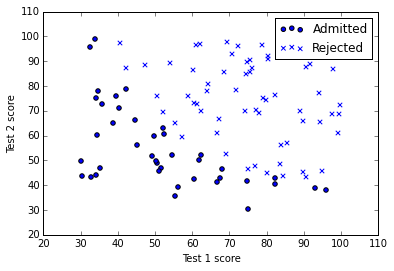

In [6]:
Ap = scatter(X[ind0,0],X[ind0,1],marker='o')
Rp = scatter(X[ind1,0],X[ind1,1],marker='x')
xlabel('Test 1 score')
ylabel('Test 2 score')
legend((Ap,Rp),('Admitted','Rejected'))

*Add constant constant vector to features X*

In [7]:
y = y[:,newaxis]
x0 = ones(shape(y))
X = hstack((x0,X))

*Initialize parameters theta*

In [8]:
theta0 = zeros((3,1))

*Define and plot sigmoid function*

In [9]:
def sigmoid(z):
    g = 1/(1+exp(-z))
    return g

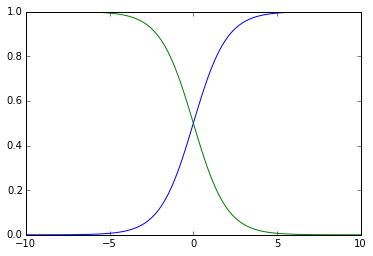

In [10]:
z = linspace(-10,10,100)
g = sigmoid(z)
plot(z,g)
plot(z,1-g)

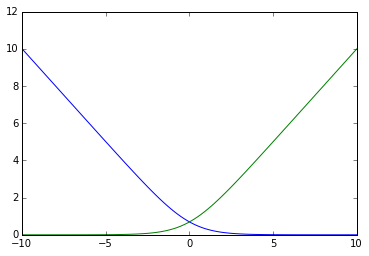

In [11]:
plot(z,-log(g))
plot(z,-log(1-g))

*Define cost function and gradient (dJ/dtheta) for logistic regression*

In [12]:
def costFunction(theta, X, y):
    m = len(y)
    z = dot(theta.T,X.T)
    h = sigmoid(z)
    cost = (-dot(y.T,log(h).T)-dot(1-y.T,log(1-h).T))/m
    return cost

In [13]:
def gradient(theta, X, y):
    m = len(y)
    z = dot(theta.T,X.T)
    h = sigmoid(z)
    grad = dot(h-y.T,X).T/m
    return grad

In [14]:
cost = costFunction(theta0,X,y)
cost

array([[ 0.69314718]])

In [15]:
grad = gradient(theta0, X, y)
grad

array([[ -0.1       ],
       [-12.00921659],
       [-11.26284221]])

*Use scipy optimize function to minimize cost function and find the parameters theta*

In [16]:
Result = op.minimize(fun = costFunction, x0 = theta0, args = (X, y), method = 'TNC',
                                 jac = gradient)

In [17]:
theta = Result.x
theta

array([-25.87303826,   0.21193256,   0.2072218 ])

*Plot boundary line between admitted/rejected*

In [18]:
xf = linspace(30,100,100)
yf = (-theta[0]-theta[1]*xf)/theta[2]

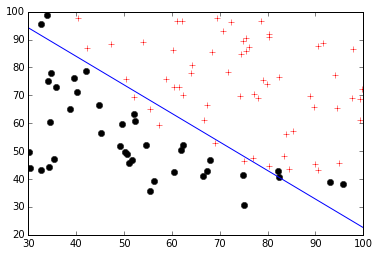

In [19]:
X0 = X[ind0,1:3]
X1 = X[ind1,1:3]
plot(X0[:,0],X0[:,1],'ko')
plot(X1[:,0],X1[:,1],'r+')
plot(xf,yf,'b')

*Probability that someone with 45 on the first test and 85 on the second test will be admitted*

In [20]:
xp = [1,45,85]
yp = sigmoid(dot(xp,theta))
yp

0.78207157768671842

*Define predict function that returns 0 if probability is less than 0.5, and 1 if probability is > 0.5 to find the success rate of our regression*

In [21]:
def predict(theta,X):
    probability = sigmoid(dot(X,theta.T))
    return [1 if x >= 0.5 else 0 for x in probability]

*Success rate is not great because the boundary between the Admitted and Rejected test scores isn't very linear*

In [22]:
1-sum((predict(theta,X)-y.T)**2)/len(y)

0.89000000000000001

##Exercise 2: Logistic Regression with feature mapping, and regularization
*Implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance
(QA). *

*Also experimenting with using Pandas for data manipulation*

In [23]:
import pandas as pd
import os

In [24]:
path = os.getcwd() + '\ex2data2.txt'
print path
data = pd.read_csv(path, header=None, names=['Test1', 'Test2', 'Accepted'])
data.head()

C:\Users\Mya\Documents\Coursera\Machine Learning\machine-learning-ex2\ex2data2.txt


,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [25]:
data.describe()

,Test1,Test2,Accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


In [26]:
(data.Test2.max(),data.Test2.min())

(1.1089, -0.76974)

In [27]:
ind0 = where(data.Accepted==0)
ind1 = where(data.Accepted==1)
Rejected = data[data['Accepted']==0]
Accepted = data[data['Accepted']==1]

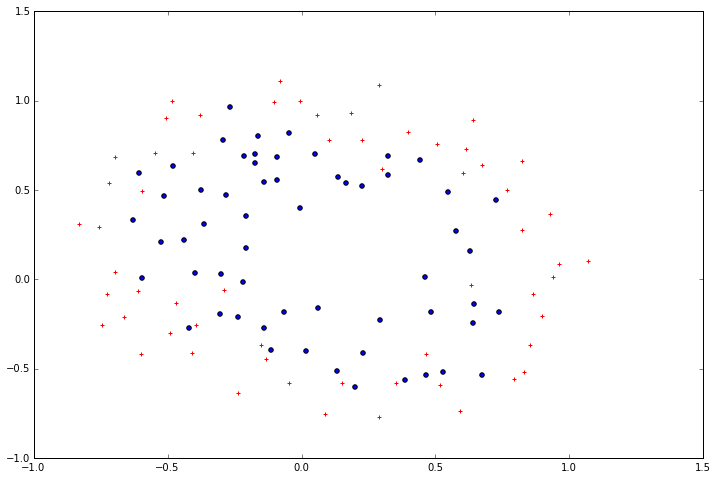

In [28]:
fig, ax = subplots(figsize=(12,8))
ax.scatter(Accepted.Test1,Accepted.Test2,c='b', marker='o', label='Accepted')
ax.scatter(Rejected['Test1'],Rejected['Test2'],c='r', marker='+', label='Accepted')

*Make Numpy arrays of the dependent and independent variables*

In [29]:
cols = data.shape[1]

X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)

In [30]:
x1 = X[:,0]
x2 = X[:,1]
x1 = x1[:,newaxis]
x2 = x2[:,newaxis]
shape(x1)

(118, 1)

*Define a function to create new polynomial features out of the original features*

In [31]:
def mapFeature(X1, X2):
    degree = 6
    out = ones(shape(X1))
    for ii in (arange(degree+1)):
        for jj in arange(ii+1):
            out = hstack((out,X1**(ii-jj)*(X2**jj)));
    return out

In [32]:
Xf = mapFeature(x1,x2)
shape(Xf)

(118, 29)

In [33]:
theta0 = zeros((shape(Xf)[1]))
shape(theta0)

(29,)

*Define cost function as before, but this time with regularization parameter beta*

In [34]:
def costFunction(theta, X, y, beta):
    m = len(y)
    z = dot(X,theta)
    h = sigmoid(z)
    cost = (-dot(y.T,log(h))-dot(1-y.T,log(1-h)))/m + beta/2/m*dot(theta[1:].T,theta[1:])
    return cost

In [35]:
def gradient(theta, X, y, LR):
    theta = matrix(theta)
    X = matrix(X)
    y = matrix(y)
    m = len(y)
    params = shape(X)[1]
    z = X*theta.T
    h = sigmoid(z)
    grad = (h-y).T*X/m
    grad[0,1:params] += LR/m*theta[0,1:]
    return grad

In [36]:
beta = 1
grad = gradient(theta0, Xf, y, beta)
shape(grad)

(1, 29)

In [37]:
costFunction(theta0, Xf, y, beta)

array([ 0.69314718])

*Try beta (regularization parameter) = 0, overfitting, no regularization*

In [38]:
Result = op.fmin_tnc(func=costFunction, x0=theta0, fprime=gradient, args=(Xf, y, 0))

In [39]:
Result

(array([   6.22672996,    6.22673046,   17.69739158,    1.91462323,
        -126.74936212,  -59.10790786,  -55.38997775, -136.35790241,
         -60.58100655,  -35.30083462,   18.09563775,  450.28650342,
         341.10788103,  508.71865508,  190.51117464,   75.62862995,
         240.98310045,  229.13254298,  279.77984812,  101.82175044,
          31.99808608,  -17.23450431, -530.4287876 , -566.54853405,
        -900.00232505, -571.20076143, -619.89870635, -229.15757165,
         -44.57799955]), 290, 3)

In [40]:
theta_min = matrix(Result[0])
predictions = predict(theta_min, Xf)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(float,correct)) / len(correct))
print 'accuracy = {0}%'.format(accuracy)

accuracy = 0.881355932203%


*Try beta (regularization parameter) = 1*

In [41]:
Result = op.fmin_tnc(func=costFunction, x0=theta0, fprime=gradient, args=(Xf, y, 1))

In [42]:
theta_min = matrix(Result[0])
predictions = predict(theta_min, Xf)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(float,correct)) / len(correct))
print 'accuracy = {0}%'.format(accuracy)

accuracy = 0.881355932203%


*Try beta (regularization parameter) = 1000 (severely underfitted)*

In [43]:
Result = op.fmin_tnc(func=costFunction, x0=theta0, fprime=gradient, args=(Xf, y, 1000))

In [44]:
theta_min = matrix(Result[0])
predictions = predict(theta_min, Xf)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(float,correct)) / len(correct))
print 'accuracy = {0}%'.format(accuracy)

accuracy = 0.508474576271%
